In [45]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


In [46]:
train_dir = "chest_xray/train"
val_dir   = "chest_xray/val"
test_dir  = "chest_xray/test"

In [47]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)



In [48]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)

val_data = test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


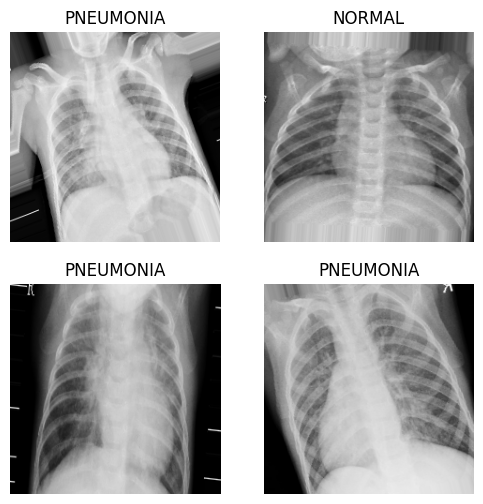

In [70]:
images, labels = next(train_data)

plt.figure(figsize=(6,6))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i])
    plt.title("PNEUMONIA" if labels[i] == 1 else "NORMAL")
    plt.axis("off")
plt.show()


In [50]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


In [51]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [53]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 122s 740ms/step - accuracy: 0.8246 - loss: 0.3833 - val_accuracy: 0.8125 - val_loss: 0.5007
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 121s 741ms/step - accuracy: 0.9068 - loss: 0.2285 - val_accuracy: 0.7500 - val_loss: 0.4747
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 123s 751ms/step - accuracy: 0.9243 - loss: 0.1891 - val_accuracy: 0.7500 - val_loss: 0.6609
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 121s 742ms/step - accuracy: 0.9245 - loss: 0.1896 - val_accuracy: 0.6875 - val_loss: 0.5239
Epoch 5/10
  3/163 ━━━━━━━━━━━━━━━━━━━━ 2:03 771ms/step - accuracy: 0.8819 - loss: 0.2237

KeyboardInterrupt: 

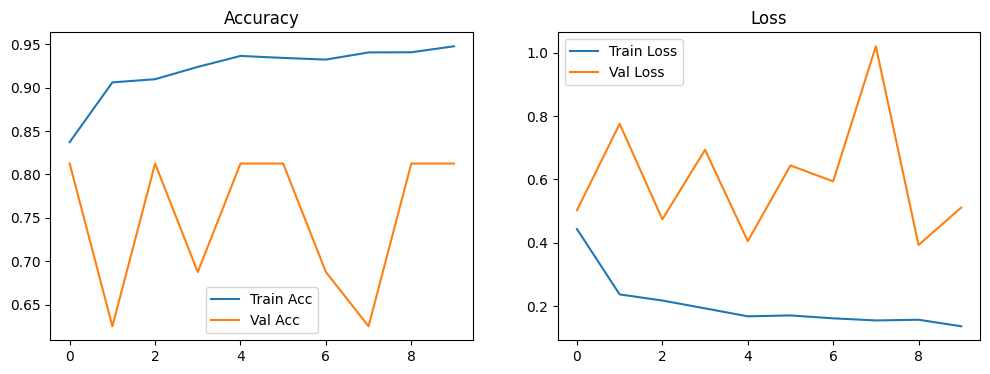

In [56]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()


In [57]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="binary"
)

test_loss, test_acc = model.evaluate(test_data)
print("Test Accuracy:", test_acc)


Found 624 images belonging to 2 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 266ms/step - accuracy: 0.9247 - loss: 0.2500
Test Accuracy: 0.9246794581413269


In [68]:
from tensorflow.keras.preprocessing import image

img_path = "chest_xray/test/PNEUMONIA/person1_virus_6.jpeg"

img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

print("Tahmin:", "PNEUMONIA" if prediction[0][0] > 0.8 else "NORMAL")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Tahmin: PNEUMONIA


In [69]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = "chest_xray/test/NORMAL/IM-0001-0001.jpeg" 

img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

print("Raw prediction:", prediction[0][0])

if prediction[0][0] > 0.8:
    print("PNEUMONIA")
else:
    print("NORMAL")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Raw prediction: 0.03811167
NORMAL
